# LAB MST

## Karan Trehan
### 18BCS6033
### 18AITAIML1 - Group B

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Importing the Required Libraries

In [2]:
#For Data Handling
import numpy as np
import pandas as pd

#For Data Visualization/Exploratory Analysis
from matplotlib import pyplot as plt
import seaborn as sns

#For Statistical Calculations
import scipy.stats as st

#For Regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

sns.set_palette('bright')
sns.set(color_codes=True)
%matplotlib inline

## Reading and Understanding the Data
Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [3]:
#Reading the Dataset
df = pd.read_csv("B1.csv")

In [4]:
#Checking the first 10 rows
df.head(10)

,number of claims,total payment for all the claims in thousands of Swedish Kronor
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
5,57,170.9
6,23,56.9
7,14,77.5
8,45,214.0
9,10,65.3


In [5]:
#Checking information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 number of claims                                                  63 non-null int64
total payment for all the claims in thousands of Swedish Kronor    63 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [6]:
#Renaming the Columns
new_columns = ['noOfClaims' , 'totalPayment']
df.columns = new_columns

Since there are two columns and both have 63 non-null values, Hence there are no, missing values.

In [7]:
#Viewing the Statistical Measures/Details of the Dataset
df.describe()

,noOfClaims,totalPayment
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


After a Soft Analysis, we can see that `noOfClaims` and `totalPayment` have outliers which need to be treated

## Checking for Missing and Duplicated Values

In [8]:
#Checking for duplicacy in the DataFrame using '.duplicated()' method and then checking the number of rows using
# '.shape[0]'
print("Number of Duplicate Rows in the DataFrame:" , df[df.duplicated()].shape[0])

Number of Duplicate Rows in the DataFrame: 0


In [9]:
#Checking the Percentage of Columns having Missing Values in both the DataFrames
print('-+-'*10)
print(round(df.isnull().sum()/len(df)*100,2))
print('-+-'*10)

-+--+--+--+--+--+--+--+--+--+-
noOfClaims      0.0
totalPayment    0.0
dtype: float64
-+--+--+--+--+--+--+--+--+--+-


* Explicitly checking the Missing Value Count.
* Inferring again that there are no Missing Values

# Data Visualization

## Univariate Analysis

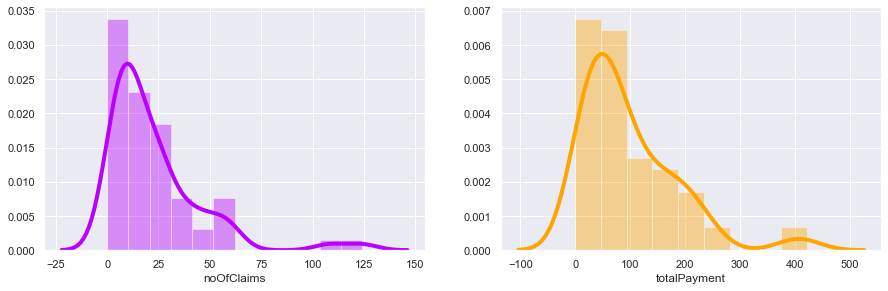

In [10]:
#Peforming the Univariate Analysis - Distribution Plot
fig, axs = plt.subplots(1,2, figsize = (15, 5))
fig.subplots_adjust(top=0.8)

sns.distplot(df['noOfClaims'],ax=axs[0],color='#BA00FF',kde_kws=dict(linewidth=4),hist=True)
axs[0].set_xlabel('noOfClaims', fontsize = 'large')

sns.distplot(df['totalPayment'],ax=axs[1],color='orange',kde_kws=dict(linewidth=4),hist=True)
axs[1].set_xlabel('totalPayment', fontsize = 'large')

plt.show()

Both the Columns are skewed

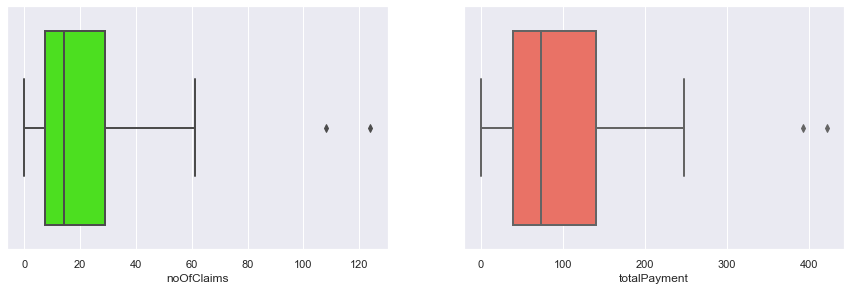

In [11]:
#Peforming the Univariate Analysis - BoxPlot
fig, axs = plt.subplots(1,2, figsize = (15, 5))
fig.subplots_adjust(top=0.8)

sns.boxplot(df['noOfClaims'] , ax = axs[0], color= '#3BFF00',linewidth=2)
axs[0].set_xlabel('noOfClaims', fontsize = 'large')

sns.boxplot(df['totalPayment'] , ax=axs[1], color='#FF6050', linewidth=2)
axs[1].set_xlabel('totalPayment', fontsize = 'large')

plt.show()

* We can infer that both the columns consist of Outliers that need to be treated.
* Presence of Skewness

## Bi-Variate Analysis

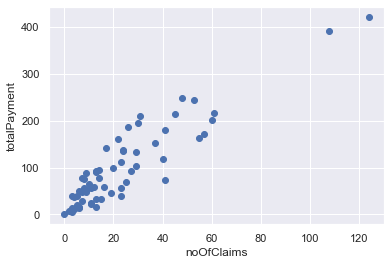

In [12]:
#Peforming the Bivariate Analysis - ScatterPlot

plt.scatter(df['noOfClaims'], df['totalPayment'], color = 'b')
plt.xlabel('noOfClaims', fontsize = 'large')
plt.ylabel('totalPayment', fontsize = 'large')

plt.show()

* Presence of Outliers can be seen.
* Data is following a linear relationship

## Performing Outlier Analysis and Removal

In [13]:
#Calculating Inter Quartile Range, we can infer the presence of outliers statistically
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print(IQR)

noOfClaims       21.50
totalPayment    101.15
dtype: float64


In [14]:
#Dropping the Outliers
print(df.shape)
df = df[~((df < (q1 - 1.5 * IQR)) |(df > (q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

(63, 2)
(61, 2)


In [15]:
df['noOfClaims']

1     19
2     13
4     40
5     57
6     23
      ..
58     9
59    31
60    14
61    53
62    26
Name: noOfClaims, Length: 61, dtype: int64

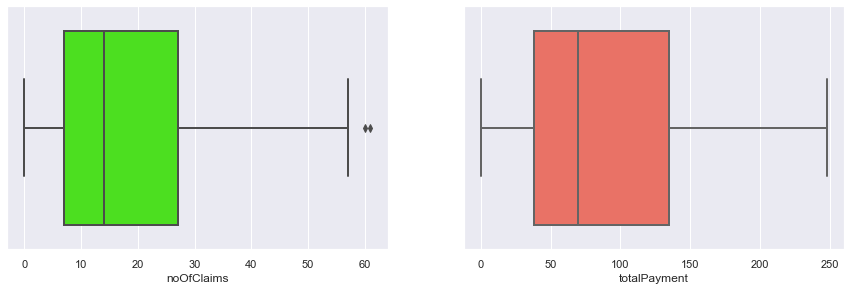

In [16]:
#Peforming the Univariate Analysis - BoxPlot
fig, axs = plt.subplots(1,2, figsize = (15, 5))
fig.subplots_adjust(top=0.8)

sns.boxplot(df['noOfClaims'] , ax = axs[0], color= '#3BFF00',linewidth=2)
axs[0].set_xlabel('noOfClaims', fontsize = 'large')

sns.boxplot(df['totalPayment'] , ax=axs[1], color='#FF6050', linewidth=2)
axs[1].set_xlabel('totalPayment', fontsize = 'large')

plt.show()

## Performing Transformation of Variables to remove Skewness

In [17]:
df.skew()

noOfClaims      1.080648
totalPayment    0.775697
dtype: float64

In [18]:
#Creating two lists for columns which are Right Skewednand Left Skewed
right_skewed=[]
left_skewed=[]

#Column Names of Columns having Skewness greater than 0.5 are placed in the right_skewed list and vice versa for left_skewed
for i in df.columns:
    if st.skew(df[i])>0.5:
        right_skewed.append(i)
    elif st.skew(df[i])<-0.5:
        left_skewed.append(i)

#Printing the Lists
print('Right Skewed :\n ', right_skewed,'\n\nLeft  Skewed :\n ',left_skewed)

Right Skewed :
  ['noOfClaims', 'totalPayment'] 

Left  Skewed :
  []


* Both the columns are skewed towards the right

In [19]:
#If the columns in the right_skewed list have minimum value 0, then they undergo Square-Root Transformation
#Else the columns undergo Logarithmic Transformation
for i in right_skewed:
    if (min(df[i]) == 0):
        df[i]= np.sqrt((df[i]))
    else:
        df[i]= np.log((df[i]))

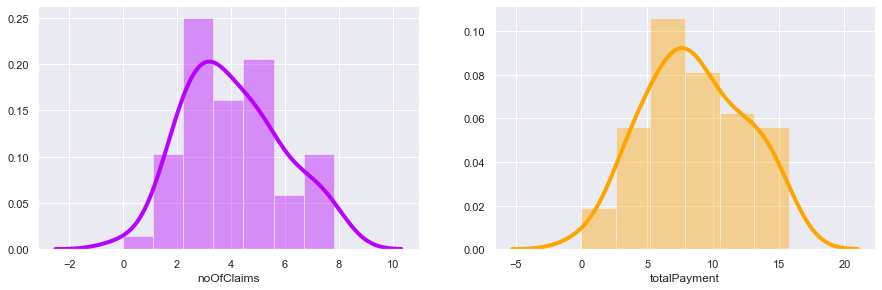

In [20]:
#Peforming the Univariate Analysis - Distribution Plot
fig, axs = plt.subplots(1,2, figsize = (15, 5))
fig.subplots_adjust(top=0.8)

sns.distplot(df['noOfClaims'],ax=axs[0],color='#BA00FF',kde_kws=dict(linewidth=4),hist=True)
axs[0].set_xlabel('noOfClaims', fontsize = 'large')

sns.distplot(df['totalPayment'],ax=axs[1],color='orange',kde_kws=dict(linewidth=4),hist=True)
axs[1].set_xlabel('totalPayment', fontsize = 'large')

plt.show()

* We can see that the skewness has been rectified.
* Both the plots are normally distributed

In [21]:
#Checking the stats to observe any change
df.describe()

,noOfClaims,totalPayment
count,61.000000,61.000000
mean,4.081519,8.603733
std,1.801912,3.776291
min,0.000000,0.000000
25%,2.645751,6.172520
50%,3.741657,8.318654
75%,5.196152,11.614646
max,7.810250,15.751190


Now the Statistics Look Normal. 

## Splitting the Dataset into Train and Test Datasets

In [22]:
# y = df.pop('totalPayment')
# X = df
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Scaling the Features

In [23]:
#Scaling the Features between 0 - 1, for easier and efficient performance by the Model
scaler = MinMaxScaler()
num_vars = df.columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [24]:
y_train = df_train.pop('totalPayment')
X_train = df_train
y_test = df_test.pop('totalPayment')
X_test = df_test

In [25]:
X_train.head()

,noOfClaims
40,0.342609
44,0.938391
28,0.192547
56,0.635239
49,0.049693


In [26]:
y_train.head()

40    0.540807
44    0.780872
28    0.233230
56    0.867810
49    0.309005
Name: totalPayment, dtype: float64

## Model-1 Using Ordinary Least Square Linear Model

In [27]:
# Adding a constant manually because OLS otherwise fits the line through the origin
X_train_lm = sm.add_constant(X_train[list(X_train.columns)])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

#Viewing Summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           totalPayment   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     117.8
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.73e-13
Time:                        12:37:40   Log-Likelihood:                 23.882
No. Observations:                  42   AIC:                            -43.76
Df Residuals:                      40   BIC:                            -40.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1190      0.039      3.045      0.0

In [28]:
#Creating a function for Error Terms Distribution Plot
def errorTermsPlot(y,y_hat,color,typ,xlabel):
    # Plot the histogram of the error terms
    fig = plt.figure()
    sns.distplot(((y) - y_hat), bins = 20,color=color,kde_kws=dict(linewidth=4))
    fig.suptitle('Error Terms for ' + typ + ' Data' , fontsize = 15)                  # Plot heading 
    plt.xlabel(xlabel, fontsize = 12)

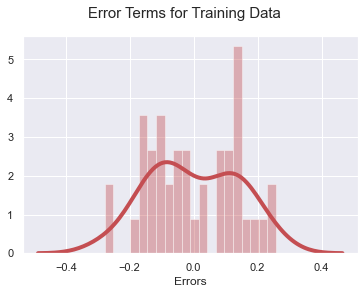

In [29]:
#Predicting y_train based on X_train_lm
y_train_pred = lr.predict(X_train_lm)

#Plotting the Graph
errorTermsPlot(y_train,y_train_pred,'r','Training','Errors')

In [30]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns.values]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lr.predict(X_test_new)

In [31]:
#Creating a function for y_test vs y_pred Plot
def yTest_vs_yPredPlot(y,y_hat,color):
    # Plotting y_test and y_pred to understand the spread.
    fig = plt.figure()
    plt.scatter(y,y_hat,color=color)
    fig.suptitle('y_test v/s y_pred', fontsize=15)            # Plot heading 
    plt.xlabel('y_test', fontsize=12)                          # X-label
    plt.ylabel('y_pred', fontsize=12)  

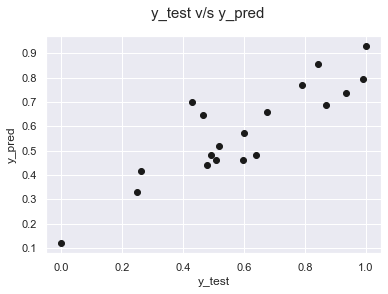

In [32]:
#Plotting y_test vs y_pred for Model 1
yTest_vs_yPredPlot(y_test,y_pred,'k')

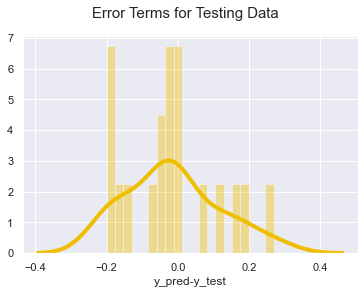

In [33]:
#Plotting the Graph for Test Errors
errorTermsPlot(y_pred,y_test,'#EFBE01','Testing','y_pred-y_test')

## Model-2 Using Linear Regression Model from scikit-learn

In [34]:
# initialize the linear regression model
lModel = LinearRegression()

# fitting the model on X_train and y_train
lModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

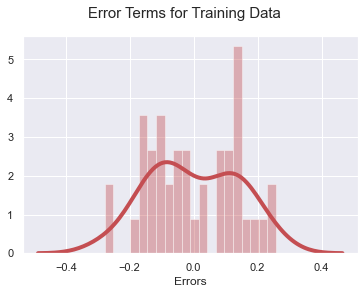

In [35]:
#Predicting y_train based on X_train_lm
y_train_pred2 = lModel.predict(X_train)

#Plotting the Graph
errorTermsPlot(y_train,y_train_pred2,'r','Training','Errors')

In [36]:
# Making predictions
y_pred2 = lModel.predict(X_test)

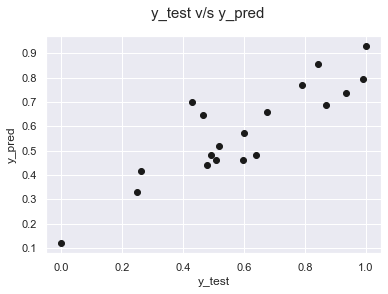

In [37]:
#Plotting y_test vs y_pred for Model 1
yTest_vs_yPredPlot(y_test,y_pred2,'k')

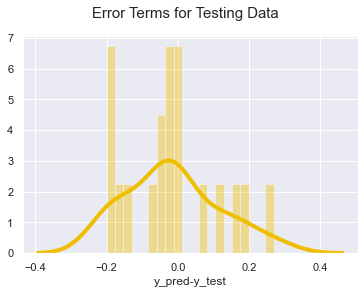

In [38]:
#Plotting the Graph for Test Errors
errorTermsPlot(y_pred2,y_test,'#EFBE01','Testing','y_pred-y_test')

## Model-3 Using Decision Tree Regressor Model from scikit-learn

In [39]:
# defining a decision tree model with a depth of 5. You can further tune the hyperparameters to improve the score
dt_reg = DecisionTreeRegressor(max_depth=5)

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

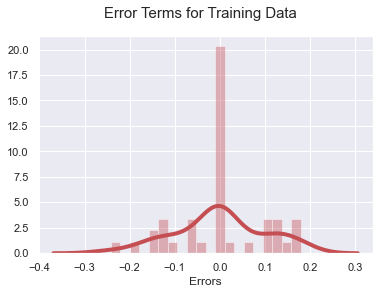

In [40]:
#Predicting y_train based on X_train_lm
y_train_pred3 = dt_reg.predict(X_train)

#Plotting the Graph
errorTermsPlot(y_train,y_train_pred3,'r','Training','Errors')

In [41]:
# Making predictions
y_pred3 = dt_reg.predict(X_test)

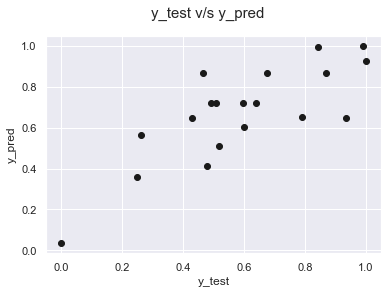

In [42]:
#Plotting y_test vs y_pred for Model 1
yTest_vs_yPredPlot(y_test,y_pred3,'k')

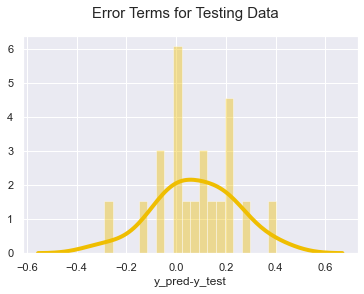

In [43]:
#Plotting the Graph for Test Errors
errorTermsPlot(y_pred3,y_test,'#EFBE01','Testing','y_pred-y_test')

## Selecting the Best Model by checking Error Metrics of all the Data Models

In [44]:
#Defining the Funtion 'errorMetrics' which will Calculate various paramets(Squared error, Mean Squared error,
#Root Mean Squared error and R-Squared Value)
def errorMetrics(y_pred,y):
    error = y_pred - y

    SE = np.square(error) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(error) / np.var(y))
    print('Squared Error',round(sum(SE),3) ,
          '\nMean Squared Error' , round(MSE,3),
          '\nRoot Mean Squared Error' , round(RMSE,3),
          '\nR Squared' , round(Rsquared,3),'\n\n')
    return Rsquared

In [45]:
#Passing the pred_variables to the function
pred_variables=[[y_train_pred,y_train],
                [y_pred,y_test],
                [y_train_pred2,y_train],
                [y_pred2,y_test],
                [y_train_pred3,y_train],
                [y_pred3,y_test]]

#Creating a Dictionary from which we will create a Dataframe later on
d = {'Train R2':[],'Test R2':[]}
j=1

for i in pred_variables:
    print('*'*40)
    if(j%2==0):
        print('---------Test Error of Model',int(j/2),'---------')
    else:
        print('---------Train Error of Model',int(j-(j/2)+1),'--------')
    
    #Calculating R2 value and appending them to Test R2 and Train R2 respectively
    r = errorMetrics(i[0],i[1])
    if(j%2==0):
        d['Test R2'].append(r)
    else:
        d['Train R2'].append(r)
    j+=1
print('*'*40)

#Creating a DataFrame from the above dictionary
models = pd.DataFrame(d,index=['OLS Model','Linear Regression Model' , 'Decision Tree Regressor Model' ])
models

****************************************
---------Train Error of Model 1 --------
Squared Error 0.789 
Mean Squared Error 0.019 
Root Mean Squared Error 0.137 
R Squared 0.746 


****************************************
---------Test Error of Model 1 ---------
Squared Error 0.315 
Mean Squared Error 0.017 
Root Mean Squared Error 0.129 
R Squared 0.759 


****************************************
---------Train Error of Model 2 --------
Squared Error 0.789 
Mean Squared Error 0.019 
Root Mean Squared Error 0.137 
R Squared 0.746 


****************************************
---------Test Error of Model 2 ---------
Squared Error 0.315 
Mean Squared Error 0.017 
Root Mean Squared Error 0.129 
R Squared 0.759 


****************************************
---------Train Error of Model 3 --------
Squared Error 0.409 
Mean Squared Error 0.01 
Root Mean Squared Error 0.099 
R Squared 0.869 


****************************************
---------Test Error of Model 3 ---------
Squared Error 0.599 
Mea

,Train R2,Test R2
OLS Model,0.746459,0.758646
Linear Regression Model,0.746459,0.758646
Decision Tree Regressor Model,0.868630,0.623743


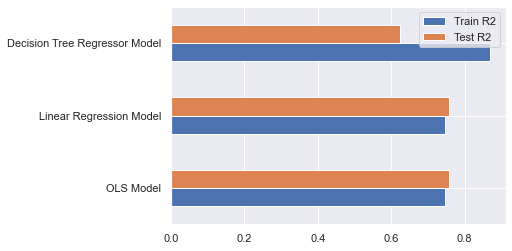

In [46]:
#Plotting the Bar Graph for all the Variables in the DataFrame 'models'
models.plot(kind='barh')

#### We can finally observe that:
#### 1. Decision Tree Regressor Model performs highly on Training Dataset but very poorly on testing Dataset
#### 2. Linear Regression Model performs fairly.
#### 3. OLS Model performs best on both the datasets.

#### So I will choose OLS Model

In [47]:
#Creating Equation for OLS Model
l = np.around(np.array(lr.params.values),3)
s=''
for i in zip(lr.params.index,l):
    s += str(i[0]) + '    *     ' + str(i[1]) + '    +    '
print(s)

const    *     0.119    +    noOfClaims    *     0.812    +    


### Final Equation

`total payment` = `const`  *  0.119 + `noOfClaims`  *  0.812

###### Thank You!